In [1]:
import os

import numpy as np
import pandas as pd
from importlib import reload

from src import constants as Con

from src.predictive_modeling.answer_correctness.answer_correctness_data import (
    build_trial_level_with_area_metrics_for_correctness,
    build_trial_level_with_derived_features_for_correctness,
    build_trial_level_full_features_for_correctness,

)
from src.predictive_modeling.answer_correctness.answer_correctness_models import (
    MajorityBaselineCorrectness,
    AreaMetricsCorrectnessLogRegModel,
    DerivedFeaturesCorrectnessLogRegModel,
    FullFeaturesCorrectnessLogRegModel,
)
from src.predictive_modeling.answer_correctness.answer_correctness_eval import (
    evaluate_models_on_answer_correctness,
)
from src.predictive_modeling.answer_correctness.answer_correctness_viz import (
    show_correctness_model_results,
)
from src.predictive_modeling.common.viz_utils import plot_confusion_heatmap

In [2]:
hunters = pd.read_csv("../data/hunters.csv")
gatherers = pd.read_csv("../data/gatherers.csv")

In [3]:
correctness_models = [
    MajorityBaselineCorrectness(),
    AreaMetricsCorrectnessLogRegModel(
        name="correctness_log_reg+lastloc",
        include_last_location=True,
    ),
    AreaMetricsCorrectnessLogRegModel(
        name="correctness_log_reg+nolastloc",
        include_last_location=False,
    ),
    DerivedFeaturesCorrectnessLogRegModel(),

    FullFeaturesCorrectnessLogRegModel(
        name="full_features_log_reg+lastloc",
        include_last_location=True,
    ),
    FullFeaturesCorrectnessLogRegModel(
        name="full_features_log_reg+nolastloc",
        include_last_location=False,
    ),

]



In [4]:
pref_metric_cols = [
    Con.IA_DWELL_TIME,
    Con.SKIP_RATE,
    Con.MEAN_FIXATIONS_COUNT,
    Con.MEAN_FIRST_FIXATION_DURATION,
]

In [5]:
results_hunters_corr_full = evaluate_models_on_answer_correctness(
    df=hunters,
    models=correctness_models,
    group_cols=(Con.PARTICIPANT_ID, Con.TRIAL_ID),
    split_group_col=Con.PARTICIPANT_ID,
    builder_fn=lambda d, group_cols, last_loc_col: build_trial_level_full_features_for_correctness(
        d,
        group_cols=group_cols,
        pref_metric_cols=pref_metric_cols,
        include_last_location=True,
    ),
)

show_correctness_model_results(results_hunters_corr_full)

C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL: majority_baseline
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.874
Positive (correct) trials: 1700
Negative (incorrect) trials: 244

Precision / Recall / F1 (per class):
         precision  recall    f1  support
class_0      0.000   0.000 0.000      244
class_1      0.874   1.000 0.933     1700

Averages:
  macro   P/R/F1: 0.437 / 0.500 / 0.467
  weighted P/R/F1: 0.765 / 0.874 / 0.816

Confusion Matrix:
        pred_0  pred_1
true_0       0     244
true_1       0    1700

MODEL: correctness_log_reg+lastloc
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.738
Positive (correct) trials: 1700
Negative (incorrect) trials: 244

Precision / Recall / F1 (per class):
         precision  recall    f1  support
class_0      0.217   0.418 0.286      244
class_1      0.904   0.784 0.840     1700

Averages:
  macro   P/R/F1: 0.561 / 0.601 / 0.563
  weighted P/R/F1: 0

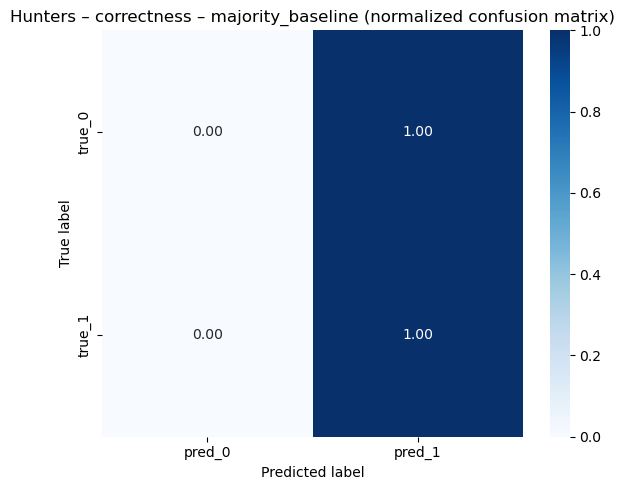

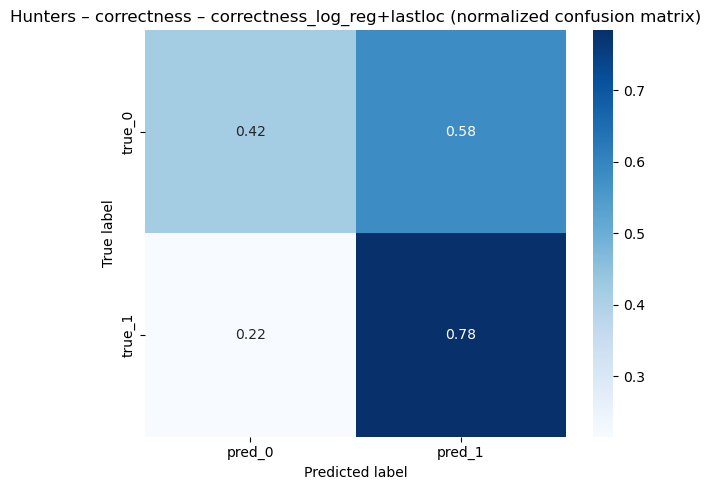

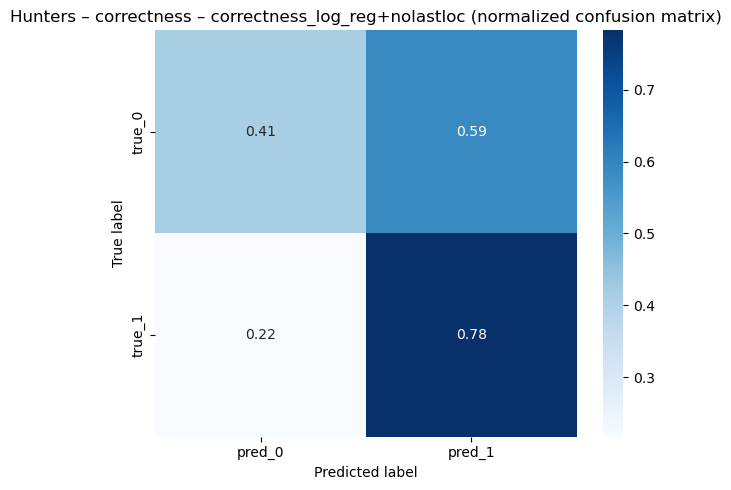

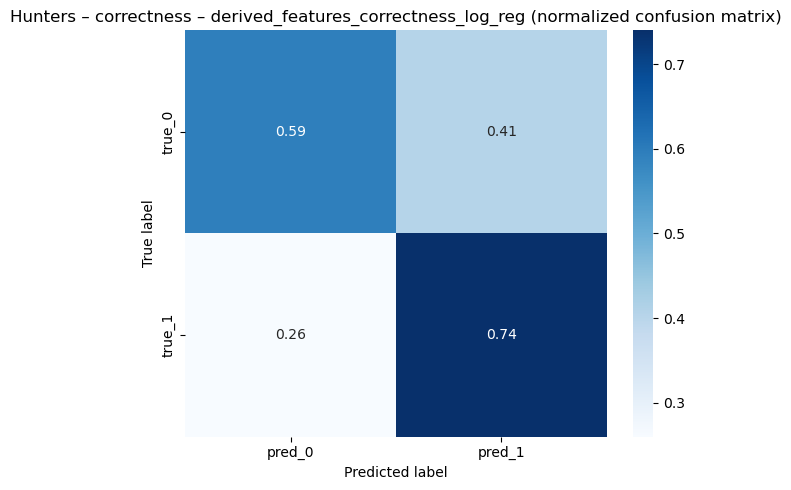

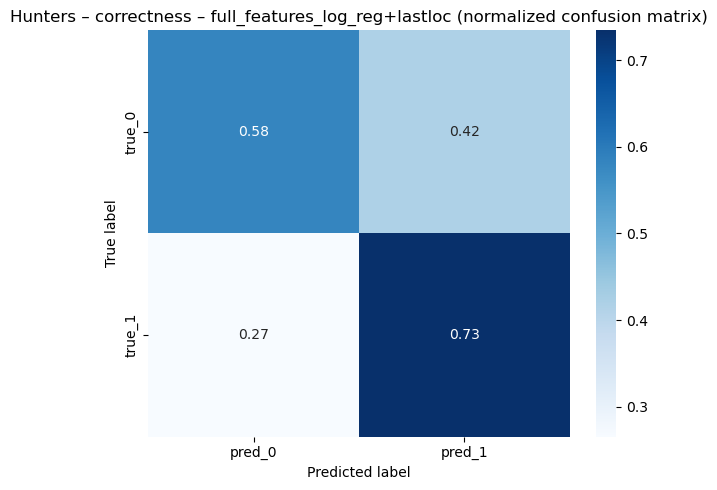

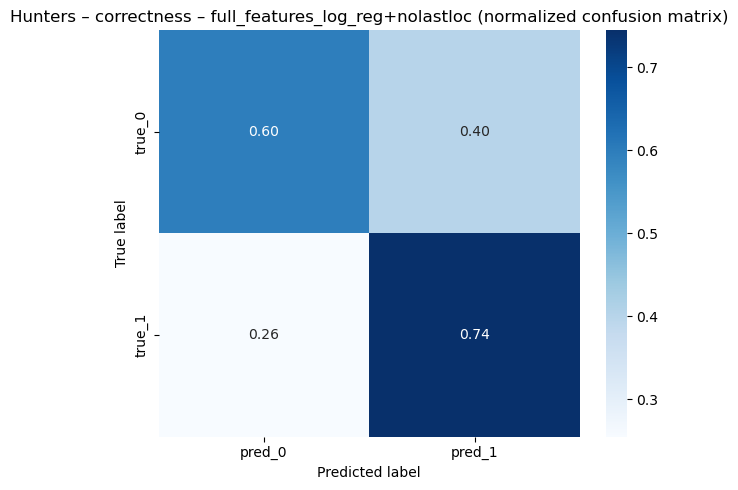

In [7]:
for name, res in results_hunters_corr_full.items():
    plot_confusion_heatmap(
        y_true=res.y_true,
        y_pred=res.y_pred,
        labels=(0, 1),
        include_minus1=False,
        normalize=True,
        title=f"Hunters – correctness – {name} (normalized confusion matrix)",
    )

In [8]:
results_gatherers_corr_full = evaluate_models_on_answer_correctness(
    df=gatherers,
    models=correctness_models,
    group_cols=(Con.PARTICIPANT_ID, Con.TRIAL_ID),
    split_group_col=Con.PARTICIPANT_ID,
    builder_fn=lambda d, group_cols, last_loc_col: build_trial_level_full_features_for_correctness(
        d,
        group_cols=group_cols,
        pref_metric_cols=pref_metric_cols,
        include_last_location=True,
    ),
)

show_correctness_model_results(results_gatherers_corr_full)

C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL: majority_baseline
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.844
Positive (correct) trials: 1640
Negative (incorrect) trials: 304

Precision / Recall / F1 (per class):
         precision  recall    f1  support
class_0      0.000   0.000 0.000      304
class_1      0.844   1.000 0.915     1640

Averages:
  macro   P/R/F1: 0.422 / 0.500 / 0.458
  weighted P/R/F1: 0.712 / 0.844 / 0.772

Confusion Matrix:
        pred_0  pred_1
true_0       0     304
true_1       0    1640

MODEL: correctness_log_reg+lastloc
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.722
Positive (correct) trials: 1640
Negative (incorrect) trials: 304

Precision / Recall / F1 (per class):
         precision  recall    f1  support
class_0      0.242   0.365 0.291      304
class_1      0.870   0.788 0.827     1640

Averages:
  macro   P/R/F1: 0.556 / 0.577 / 0.559
  weighted P/R/F1: 0

C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


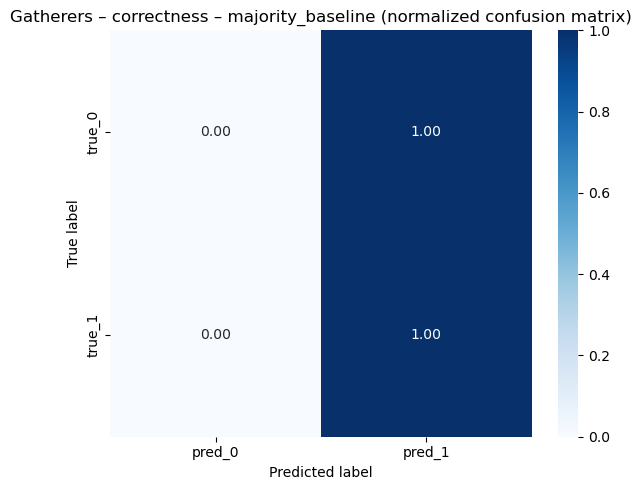

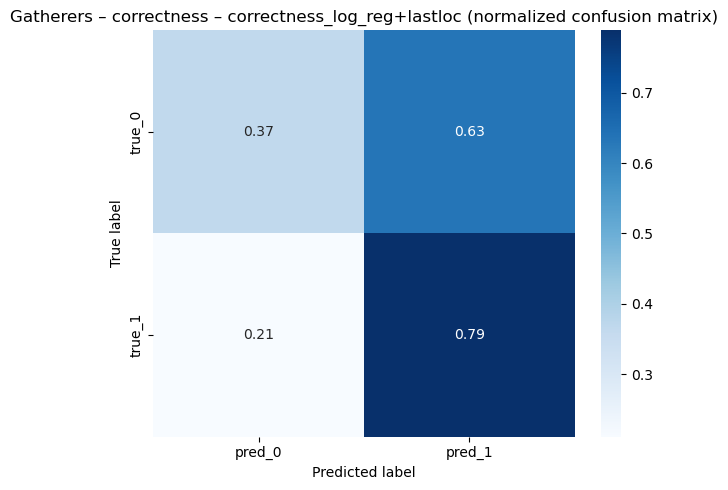

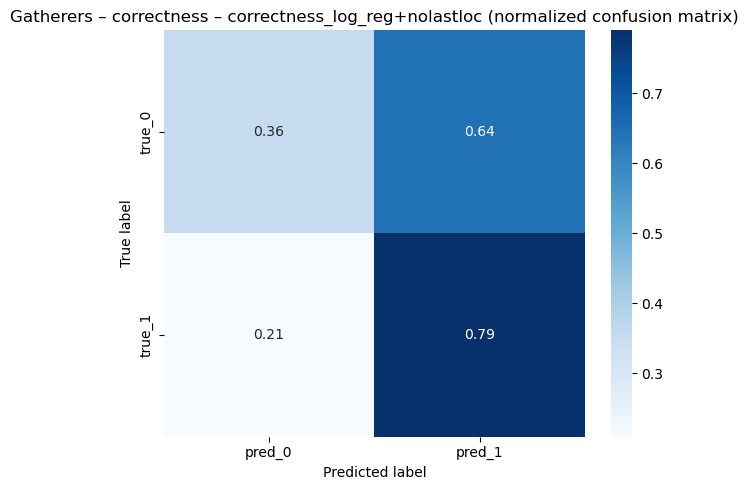

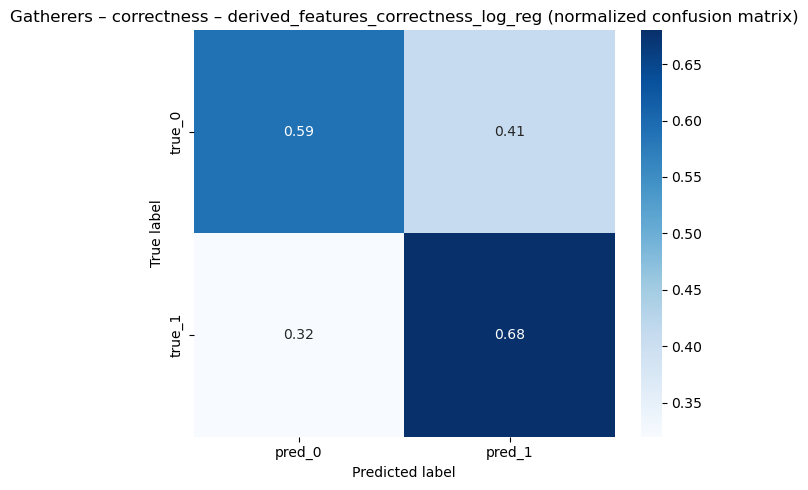

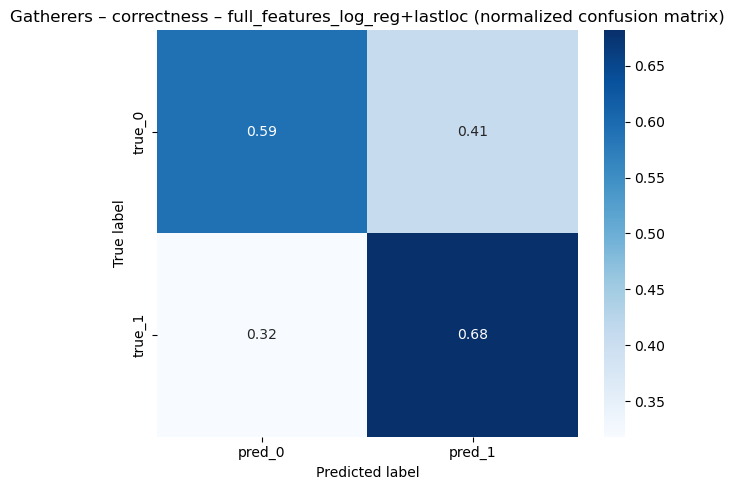

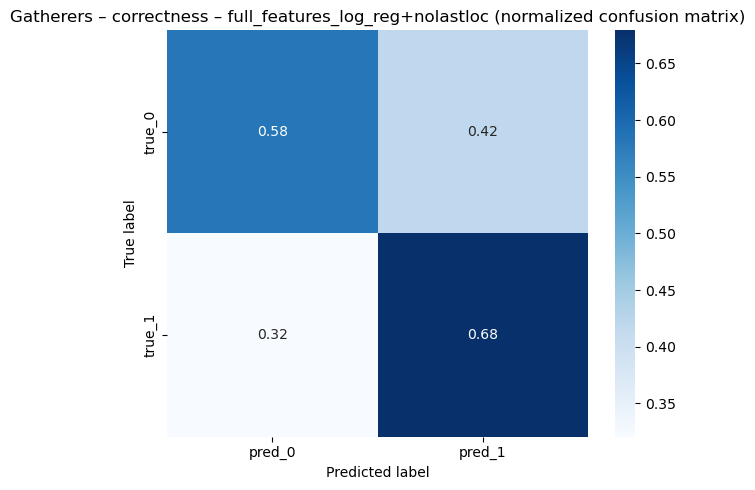

In [9]:
for name, res in results_gatherers_corr_full.items():
    plot_confusion_heatmap(
        y_true=res.y_true,
        y_pred=res.y_pred,
        labels=(0, 1),
        include_minus1=False,
        normalize=True,
        title=f"Gatherers – correctness – {name} (normalized confusion matrix)",
    )

In [10]:
all_participants = pd.concat([hunters, gatherers], ignore_index=True)


In [11]:
results_all_corr_full = evaluate_models_on_answer_correctness(
    df=all_participants,
    models=correctness_models,
    group_cols=(Con.PARTICIPANT_ID, Con.TRIAL_ID),
    split_group_col=Con.PARTICIPANT_ID,
    builder_fn=lambda d, group_cols, last_loc_col: build_trial_level_full_features_for_correctness(
        d,
        group_cols=group_cols,
        pref_metric_cols=pref_metric_cols,
        include_last_location=True,
    ),
)

show_correctness_model_results(results_all_corr_full)

C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL: majority_baseline
----------------------------------------------------------------------
Number of test trials: 3888
Accuracy: 0.828
Positive (correct) trials: 3221
Negative (incorrect) trials: 667

Precision / Recall / F1 (per class):
         precision  recall    f1  support
class_0      0.000   0.000 0.000      667
class_1      0.828   1.000 0.906     3221

Averages:
  macro   P/R/F1: 0.414 / 0.500 / 0.453
  weighted P/R/F1: 0.686 / 0.828 / 0.751

Confusion Matrix:
        pred_0  pred_1
true_0       0     667
true_1       0    3221

MODEL: correctness_log_reg+lastloc
----------------------------------------------------------------------
Number of test trials: 3888
Accuracy: 0.740
Positive (correct) trials: 3221
Negative (incorrect) trials: 667

Precision / Recall / F1 (per class):
         precision  recall    f1  support
class_0      0.287   0.345 0.313      667
class_1      0.858   0.822 0.840     3221

Averages:
  macro   P/R/F1: 0.573 / 0.584 / 0.577
  weighted P/R/F1: 0

C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


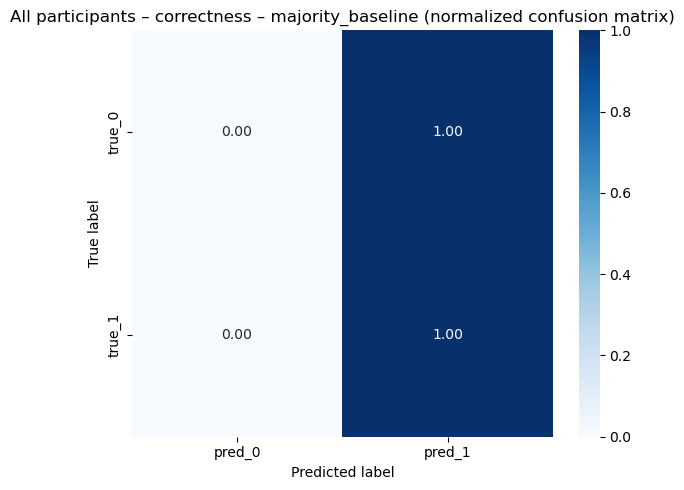

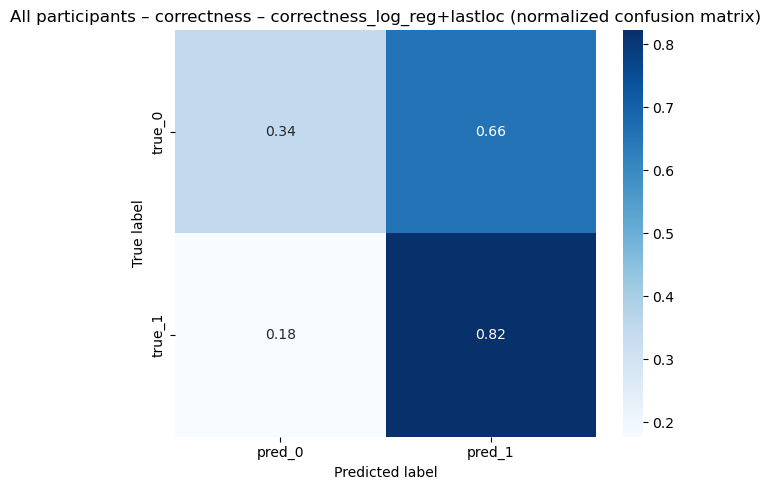

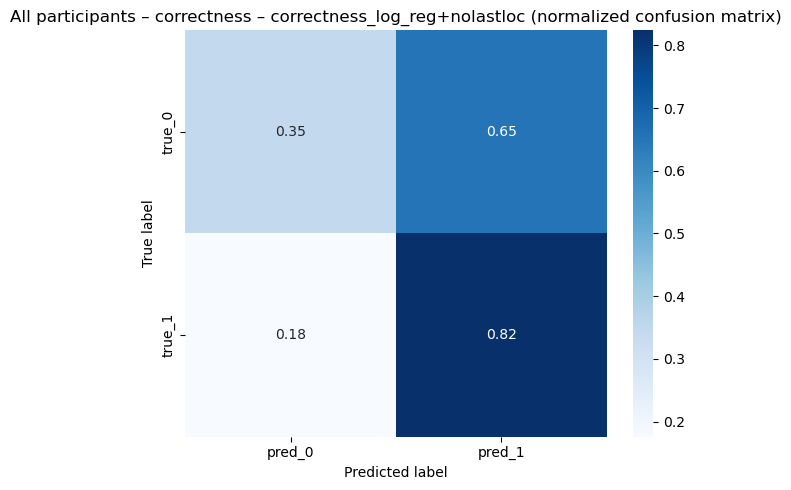

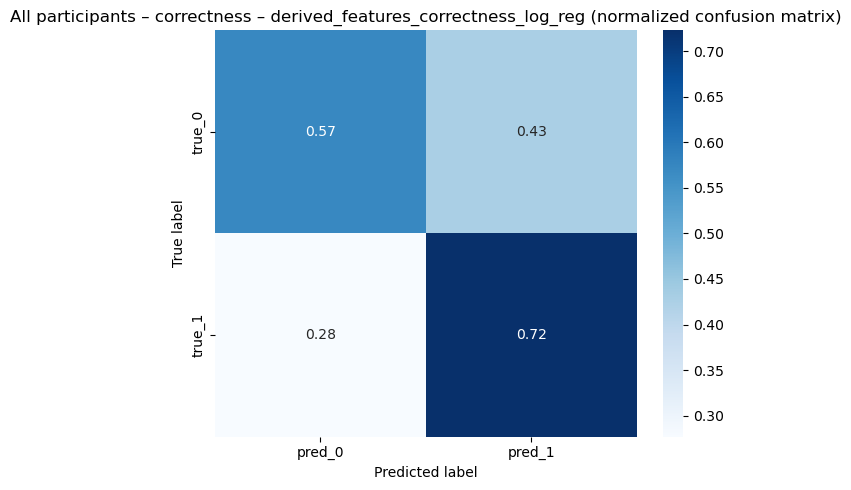

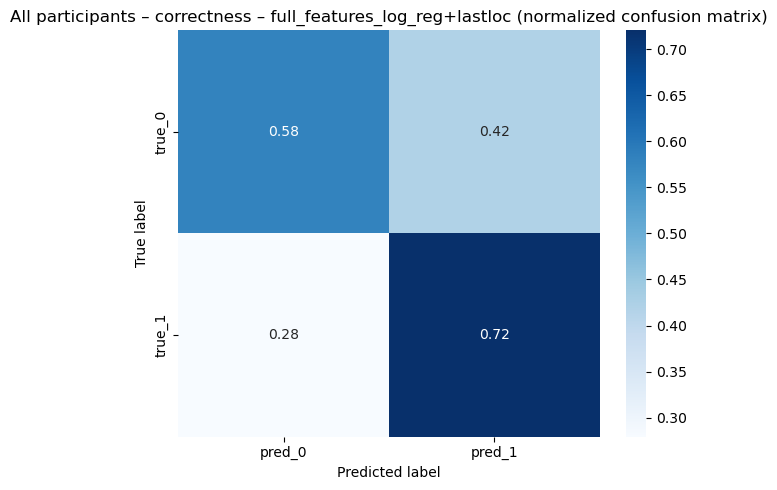

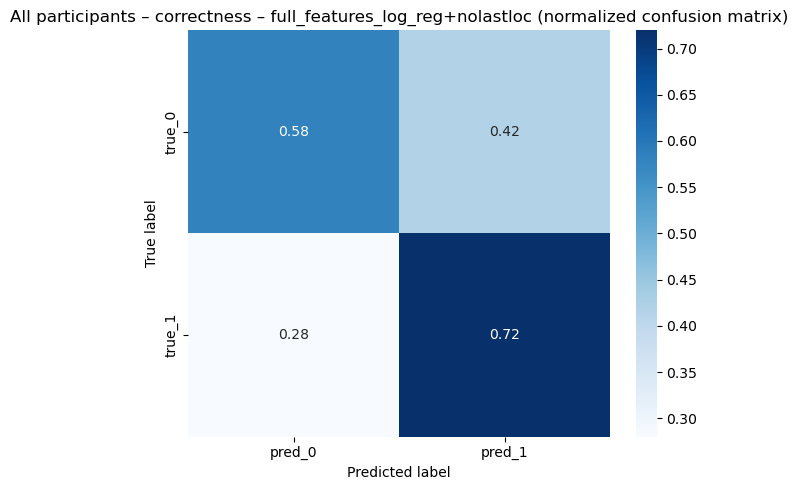

In [12]:
for name, res in results_all_corr_full.items():
    plot_confusion_heatmap(
        y_true=res.y_true,
        y_pred=res.y_pred,
        labels=(0, 1),
        include_minus1=False,
        normalize=True,
        title=f"All participants – correctness – {name} (normalized confusion matrix)",
    )